In [12]:
import sqlite3
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

In [44]:
globe = pd.read_csv('./covid/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

globe.dropna()
globe.head(10)

#China's distribution is too different from other countries
globe = globe[globe['Country/Region'] != 'China']
globe.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,212,259,267,276,284,291,315,328,346,346


In [6]:
us = pd.read_csv('./covid/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
us.head(10)
us.dropna()

globe.append(globe, ignore_index=True)
globe.dropna()
globe.shape
df = globe

df = df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
df.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20
0,0,0,0,0,0,0,0,0,0,0,...,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951
1,0,0,0,0,0,0,0,0,0,0,...,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893
2,0,0,0,0,0,0,0,0,0,0,...,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941
3,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,0,0,0,0,0,0,0,0,0,0,...,212,259,267,276,284,291,315,328,346,346


In [7]:
def mapp(x, in_min, in_max, out_min, out_max):
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

outMin = 0
outMax = 100
for i in range(df.shape[0]):
    current = df.iloc[i]
    maxVal = max(df.iloc[i])
    minVal = min(df.iloc[i])
    
    for i in range(len(current)):
        current[i] = mapp(current[i], minVal, maxVal, outMin, outMax)
    df.iloc[i] = current        

df.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20
0,0,0,0,0,0,0,0,0,0,0,...,92,92,93,94,95,96,97,98,99,100
1,0,0,0,0,0,0,0,0,0,0,...,78,80,83,85,87,89,92,95,97,100
2,0,0,0,0,0,0,0,0,0,0,...,79,81,83,85,87,89,91,94,97,100
3,0,0,0,0,0,0,0,0,0,0,...,100,100,100,100,100,100,100,100,100,100
4,0,0,0,0,0,0,0,0,0,0,...,61,74,77,79,82,84,91,94,100,100


In [59]:
features = ['3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20', '4/27/20', '4/28/20', '4/29/20', '4/30/20', '5/1/20', '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20', '5/12/20', '5/13/20', '5/14/20', '5/15/20', '5/16/20', '5/17/20', '5/18/20', '5/19/20', '5/20/20', '5/21/20', '5/22/20', '5/23/20', '5/24/20', '5/25/20', '5/26/20', '5/27/20', '5/28/20', '5/29/20', '5/30/20', '5/31/20', '6/1/20', '6/2/20', '6/3/20', '6/4/20', '6/5/20', '6/6/20', '6/7/20', '6/8/20', '6/9/20', '6/10/20', '6/11/20', '6/12/20', '6/13/20', '6/14/20', '6/15/20', '6/16/20', '6/17/20', '6/18/20', '6/19/20', '6/20/20', '6/21/20', '6/22/20', '6/23/20', '6/24/20', '6/25/20', '6/26/20', '6/27/20', '6/28/20', '6/29/20', '6/30/20', '7/1/20', '7/2/20', '7/3/20', '7/4/20','7/5/20']
#'1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20'
target = ['6/24/20', '6/25/20', '6/26/20', '6/27/20', '6/28/20', '6/29/20', '6/30/20', '7/1/20', '7/2/20', '7/3/20', '7/4/20','7/5/20']

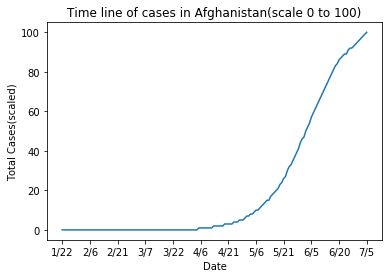

In [49]:
dates = ['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20','3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20', '4/27/20', '4/28/20', '4/29/20', '4/30/20', '5/1/20', '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20', '5/12/20', '5/13/20', '5/14/20', '5/15/20', '5/16/20', '5/17/20', '5/18/20', '5/19/20', '5/20/20', '5/21/20', '5/22/20', '5/23/20', '5/24/20', '5/25/20', '5/26/20', '5/27/20', '5/28/20', '5/29/20', '5/30/20', '5/31/20', '6/1/20', '6/2/20', '6/3/20', '6/4/20', '6/5/20', '6/6/20', '6/7/20', '6/8/20', '6/9/20', '6/10/20', '6/11/20', '6/12/20', '6/13/20', '6/14/20', '6/15/20', '6/16/20', '6/17/20', '6/18/20', '6/19/20', '6/20/20', '6/21/20', '6/22/20', '6/23/20', '6/24/20', '6/25/20', '6/26/20', '6/27/20', '6/28/20', '6/29/20', '6/30/20', '7/1/20', '7/2/20', '7/3/20', '7/4/20', '7/5/20']
dates = list(map(lambda x:x[0:len(x)-3], dates))
plt.title('Time line of cases in Afghanistan(scale 0 to 100)')
plt.xlabel('Date')
plt.ylabel('Total Cases(scaled)')
plt.xticks(np.arange(0, len(dates)+1, 15.0))
plt.plot(dates, list(df.iloc[0].values))

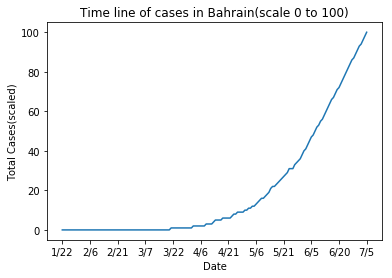

In [48]:
dates = ['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20','3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20', '4/27/20', '4/28/20', '4/29/20', '4/30/20', '5/1/20', '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20', '5/12/20', '5/13/20', '5/14/20', '5/15/20', '5/16/20', '5/17/20', '5/18/20', '5/19/20', '5/20/20', '5/21/20', '5/22/20', '5/23/20', '5/24/20', '5/25/20', '5/26/20', '5/27/20', '5/28/20', '5/29/20', '5/30/20', '5/31/20', '6/1/20', '6/2/20', '6/3/20', '6/4/20', '6/5/20', '6/6/20', '6/7/20', '6/8/20', '6/9/20', '6/10/20', '6/11/20', '6/12/20', '6/13/20', '6/14/20', '6/15/20', '6/16/20', '6/17/20', '6/18/20', '6/19/20', '6/20/20', '6/21/20', '6/22/20', '6/23/20', '6/24/20', '6/25/20', '6/26/20', '6/27/20', '6/28/20', '6/29/20', '6/30/20', '7/1/20', '7/2/20', '7/3/20', '7/4/20', '7/5/20']
dates = list(map(lambda x:x[0:len(x)-3], dates))
plt.title('Time line of cases in Bahrain(scale 0 to 100)')
plt.xlabel('Date')
plt.ylabel('Total Cases(scaled)')
plt.xticks(np.arange(0, len(dates)+1, 15.0))
plt.plot(dates, list(df.iloc[19].values))

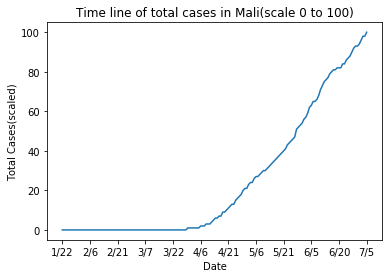

In [47]:
dates = ['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20','3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20', '4/27/20', '4/28/20', '4/29/20', '4/30/20', '5/1/20', '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20', '5/12/20', '5/13/20', '5/14/20', '5/15/20', '5/16/20', '5/17/20', '5/18/20', '5/19/20', '5/20/20', '5/21/20', '5/22/20', '5/23/20', '5/24/20', '5/25/20', '5/26/20', '5/27/20', '5/28/20', '5/29/20', '5/30/20', '5/31/20', '6/1/20', '6/2/20', '6/3/20', '6/4/20', '6/5/20', '6/6/20', '6/7/20', '6/8/20', '6/9/20', '6/10/20', '6/11/20', '6/12/20', '6/13/20', '6/14/20', '6/15/20', '6/16/20', '6/17/20', '6/18/20', '6/19/20', '6/20/20', '6/21/20', '6/22/20', '6/23/20', '6/24/20', '6/25/20', '6/26/20', '6/27/20', '6/28/20', '6/29/20', '6/30/20', '7/1/20', '7/2/20', '7/3/20', '7/4/20', '7/5/20']
dates = list(map(lambda x:x[0:len(x)-3], dates))
plt.title('Time line of total cases in Mali(scale 0 to 100)')
plt.xlabel('Date')
plt.ylabel('Total Cases(scaled)')
plt.xticks(np.arange(0, len(dates)+1, 15.0))
plt.plot(dates, list(df.iloc[209].values))

In [60]:
X = df[features]
y = df[target]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
y_prediction = regressor.predict(X_test)

In [65]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print("Sqaure mean error: " + str(RMSE))
#print(pow(RMSE, 0.5))

Sqaure mean error: 5.3814070909953455e-12
